In [11]:
# 04_compare_correlation_spread_EZH2.ipynb

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import scipy
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
sns.set(style="whitegrid")

In [15]:
# Load the dataset for the H2170 lung cancer cell line
# We call its container "df_cell", which stands for dataFrame of the cell line that holds all of the single-cell protein measurements
df_cell = pd.read_csv('/Users/22holleranm/DATA_481_766_protein_networks/shared_team_files/lung_cancer.csv', index_col=0)

# Display the first few rows
df_cell.head()

,01_cMyc_nuc_mean,01_BRD4_nuc_mean,01_CDK2_nuc_mean,02_HER2_nuc_mean,02_CyclinD1_nuc_mean,02_EGFR_nuc_mean,03_FGFR2_nuc_mean,03_CDC6_nuc_mean,03_EZH2_nuc_mean,04_cMycS62_nuc_mean,04_FOXO1_nuc_mean,04_HER2_nuc_mean,05_cMycT58_nuc_mean,05_CyclinA_nuc_mean,05_CyclinB1_nuc_mean,06_FOXO3A_nuc_mean,06_AKT_nuc_mean,06_ZEB1_nuc_mean,07_pRb_S807811_nuc_mean,07_Rb_nuc_mean,07_p21_nuc_mean,08_CDT1_nuc_mean,08_MDM2_nuc_mean,09_SKP2_nuc_mean,09_mTOR_nuc_mean,10_TGFbeta_nuc_mean,10_E2F1_nuc_mean,11_cFOS_nuc_mean,11_CDH1_nuc_mean,12_EZH2_nuc_mean,12_cPARP_nuc_mean,01_cMyc_ring_mean,01_BRD4_ring_mean,01_CDK2_ring_mean,02_HER2_ring_mean,02_CyclinD1_ring_mean,02_EGFR_ring_mean,03_FGFR2_ring_mean,03_CDC6_ring_mean,03_EZH2_ring_mean,04_cMycS62_ring_mean,04_FOXO1_ring_mean,04_HER2_ring_mean,05_cMycT58_ring_mean,05_CyclinA_ring_mean,05_CyclinB1_ring_mean,06_FOXO3A_ring_mean,06_AKT_ring_mean,06_ZEB1_ring_mean,07_pRb_S807811_ring_mean,07_Rb_ring_mean,07_p21_ring_mean,08_CDT1_ring_mean,08_MDM2_ring_mean,09_SKP2_ring_mean,09_mTOR_ring_mean,10_TGFbeta_ring_mean,10_E2F1_ring_mean,11_cFOS_ring_mean,11_CDH1_ring_mean,12_EZH2_ring_mean,12_cPARP_ring_mean
index_column,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cell_24,-0.274626,-0.632049,0.130158,0.996370,-0.217049,-0.177764,0.109605,1.356144,0.482767,-0.536020,-0.987532,-0.897249,0.243860,-0.927233,-0.002703,0.406510,-0.457381,0.887332,0.114794,-0.430899,1.254235,1.871959,0.461608,0.422949,1.406970,-0.434054,-0.922134,0.300361,0.737689,0.626121,0.519019,0.448048,0.108275,0.868095,1.319311,0.076730,-0.006708,0.263158,1.385566,0.719334,-0.402828,-1.048042,-0.925909,0.334180,-0.284215,1.325648,0.513783,-0.151589,0.874221,0.929768,0.446487,1.270743,1.188206,0.365427,1.164822,1.464958,-0.378041,-0.906202,0.209302,0.589119,0.940516,0.368686
cell_31,0.545061,0.302935,0.875525,0.416186,-0.523494,-0.444546,-0.218084,0.560125,0.388460,0.624579,-0.696834,-0.698082,0.404130,0.377436,0.506497,0.032809,-0.538555,0.346244,1.209497,0.987865,0.753873,-0.235938,-0.070285,1.566281,0.917627,-0.004364,-0.017985,0.250767,0.057809,1.478013,0.019616,0.485509,0.248573,0.915782,0.890622,-0.143222,-0.101312,0.144229,1.156873,0.543466,-0.333130,-0.913026,-0.713302,0.266901,0.122589,1.330254,0.379366,-0.188642,0.686795,0.582482,0.476434,0.979811,0.417119,0.159226,1.409255,1.360996,-0.186646,-0.669842,0.128295,0.240999,0.956225,0.188836
cell_36,0.478836,-0.622209,-0.316807,0.273643,-0.855136,-0.445459,-0.495221,0.306739,-0.401794,0.390856,-0.824935,-0.611346,-0.104029,-0.369246,-0.081758,0.202629,-0.745466,-0.057875,0.507749,0.167409,0.202370,-0.516313,-0.422799,1.228007,0.500917,0.007855,-0.462886,-0.072239,-0.370941,0.222873,-0.226078,0.010196,-0.094905,-0.103745,0.236957,-0.593180,-0.307542,-0.419718,0.570195,-0.181529,-0.053759,-0.641108,-0.577423,-0.191195,-0.458681,0.032330,-0.024514,-0.642016,-0.014706,0.181128,-0.018302,0.199695,-0.165359,-0.282927,0.601053,0.460337,0.176087,-0.256244,-0.202937,-0.290657,0.158839,-0.211352
cell_43,-0.747665,-1.171727,-0.779043,-0.258488,-1.004050,-0.582779,-0.864614,-0.471185,-0.527605,-0.821571,-0.864645,-0.990543,-0.607014,-0.717098,-0.687771,0.153157,-0.843331,-0.112361,0.669902,0.363792,-0.009721,-0.684535,-0.385856,0.154523,0.359326,-0.237356,-0.532523,-0.709584,-0.514982,-0.161593,-0.454719,-0.630292,-0.822400,-0.832541,-0.554567,-0.941967,-0.596149,-1.019525,-0.729150,-0.704892,-0.751484,-0.915185,-0.971186,-0.599293,-1.009942,-0.901189,-0.389840,-0.950625,-0.224062,-0.203456,-0.321853,-0.140230,-0.670966,-0.392751,-0.139191,-0.018206,-0.421827,-0.582895,-0.898908,-0.599372,-0.398471,-0.556434
cell_51,-0.969321,-0.830915,-0.439126,0.909262,-0.538657,1.243933,-0.292941,-0.317952,0.356104,-1.060728,-0.793165,0.505676,-0.859886,-0.976564,-0.010725,-0.142979,0.121853,1.201399,-1.370445,-1.067327,0.643206,-0.438881,1.183240,-0.800889,0.762989,-0.426352,-0.661457,0.552717,0.289812,-0.649461,0.332243,-0.781621,-0.739925,-0.295508,-0.289053,-0.793799,0.237827,-0.965990,-0.56011

In [17]:
# Combining EZH2 measurements from nuclear and cytoplasmic intensities

# Set up containers for combined EZH2 intensities
combined_EZH2_intensity_03 = []
combined_EZH2_intensity_12 = []

# Load your data
data = df_cell  # Use the main dataset

# Define the EZH2 conditions for each fluorophore/antibody, for iteration 3 and 12
conditions_02 = ['03_EZH2_nuc_mean', '03_EZH2_ring_mean']
conditions_04 = ['12_EZH2_nuc_mean', '12_EZH2_ring_mean']

# Compute combined EZH2 intensities for iteration 03
for i in data.index:
    # Average nuclear and cytoplasmic HER2 measurements
    tmp = (data.loc[i, '03_EZH2_nuc_mean'] + data.loc[i, '03_EZH2_ring_mean']) / 2
    combined_EZH2_intensity_03.append(tmp)

# Compute combined EZH2 intensities for iteration 12
for i in data.index:
    tmp = (data.loc[i, '12_EZH2_nuc_mean'] + data.loc[i, '12_EZH2_ring_mean']) / 2
    combined_EZH2_intensity_12.append(tmp)

# Add the combined HER2 intensities as new columns in the dataset
data['03_EZH2_combined'] = combined_EZH2_intensity_03
data['12_EZH2_combined'] = combined_EZH2_intensity_12

all_nuc_or_cyt = ['01_cMyc_nuc_mean', '01_BRD4_nuc_mean', '01_CDK2_nuc_mean', '02_CyclinD1_nuc_mean', 
 '03_CDC6_nuc_mean', '02_HER2_nuc_mean', '04_cMycS62_nuc_mean', '04_FOXO1_nuc_mean', 
 '05_cMycT58_nuc_mean', '05_CyclinA_nuc_mean', '05_CyclinB1_nuc_mean', '06_FOXO3A_nuc_mean', 
 '06_ZEB1_nuc_mean', '07_pRb_S807811_nuc_mean', '07_Rb_nuc_mean', '07_p21_nuc_mean', 
 '08_CDT1_nuc_mean', '08_MDM2_nuc_mean', '09_SKP2_nuc_mean', '10_TGFbeta_nuc_mean', 
 '10_E2F1_nuc_mean', '11_cFOS_nuc_mean', '04_HER2_nuc_mean', '12_cPARP_nuc_mean']

selection = all_nuc_or_cyt

In [19]:
# Iteration 03

# Dataset and EZH2 condition column
data = df_cell
cond = '03_EZH2_combined'  # Column representing EZH2 combined expression

# Identify the top and bottom 10% of EZH2 expression
top_10_percent = data[cond].quantile(0.9)  # Value at the 90th percentile
bottom_10_percent = data[cond].quantile(0.1)  # Value at the 10th percentile

# Add a new column to label the HER2 groups
data['EZH2_Group'] = 'Middle'  # Default to 'Middle' group
data.loc[data[cond] >= top_10_percent, 'EZH2_Group'] = 'High EZH2'  # Top 10%
data.loc[data[cond] <= bottom_10_percent, 'EZH2_Group'] = 'Low EZH2'  # Bottom 10%

# Verify the new column and data
print("Updated dataset with EZH2 groups:")
print(data[['EZH2_Group', cond]].head())  # Display the EZH2 group and condition

data_high = data[data.EZH2_Group=='High EZH2'].drop('EZH2_Group',axis=1)[selection]
data_low = data[data.EZH2_Group=='Low EZH2'].drop('EZH2_Group',axis=1)[selection]

# Compute correlation coefficients for EZH2 High and Low groups
correlations_high = data_high.corr().values.flatten()
correlations_low = data_low.corr().values.flatten()

correlations_high = correlations_high[~np.isnan(correlations_high)]
correlations_low = correlations_low[~np.isnan(correlations_low)]
correlations_high_03 = correlations_high[correlations_high != 1]
correlations_low_03 = correlations_low[correlations_low != 1]

Updated dataset with EZH2 groups:
             EZH2_Group  03_EZH2_combined
index_column                             
cell_24       High EZH2          0.601051
cell_31       High EZH2          0.465963
cell_36          Middle         -0.291661
cell_43          Middle         -0.616248
cell_51          Middle         -0.095766


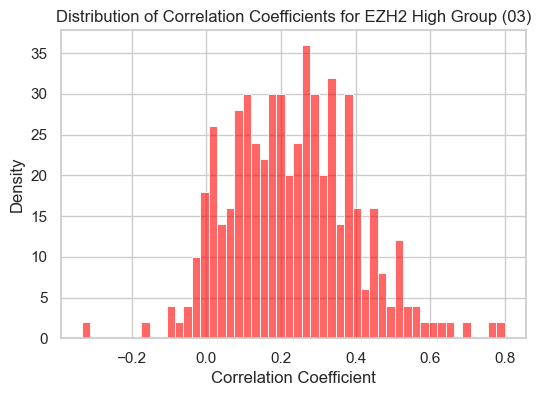

In [23]:
# Plot distributions of correlation coefficients high group
plt.figure(figsize=(6, 4))
sns.histplot(correlations_high_03, bins=50, color='red', alpha=0.6, label='EZH2 High (03)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Density')
plt.title('Distribution of Correlation Coefficients for EZH2 High Group (03)')
plt.show()

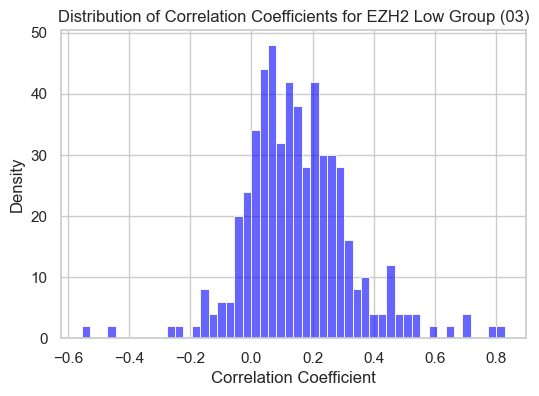

In [25]:
# Plot distributions of correlation coefficients high group
plt.figure(figsize=(6, 4))
sns.histplot(correlations_low_03, bins=50, color='blue', alpha=0.6, label='EZH2 Low (03)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Density')
plt.title('Distribution of Correlation Coefficients for EZH2 Low Group (03)')
plt.show()

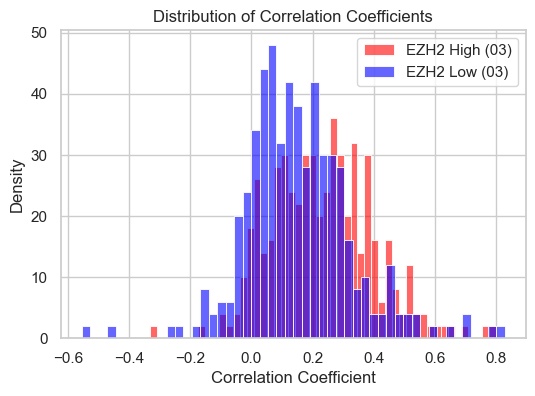

In [27]:
# Plot distributions together
plt.figure(figsize=(6, 4))
sns.histplot(correlations_high_03, bins=50, color='red', alpha=0.6, label='EZH2 High (03)')
sns.histplot(correlations_low_03, bins=50, color='blue', alpha=0.6, label='EZH2 Low (03)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Density')
plt.title('Distribution of Correlation Coefficients')
plt.legend()
plt.show()

In [29]:
# Compute and compare the spread of correlations
minmax_high_03 = [min(correlations_high_03), max(correlations_high_03)]
minmax_low_03 = [min(correlations_low_03), max(correlations_low_03)]
range_high_03 = minmax_high_03[1] - minmax_high_03[0]
range_low_03 = minmax_low_03[1] - minmax_low_03[0]

print("Spread of correlation coefficients (min and max):")
print(f"EZH2 High (03): {minmax_high_03}")
print(f"EZH2 Low (03): {minmax_low_03}")

print("Spread of correlation coefficients (range):")
print(f"EZH2 High (03): {range_high_03}")
print(f"EZH2 Low (03): {range_low_03}")

spread_high_03 = np.percentile(correlations_high_03, [5, 95])
spread_low_03 = np.percentile(correlations_low_03, [5, 95])

print("Spread of correlation coefficients (5th to 95th percentile):")
print(f"EZH2 High (03): {spread_high_03}")
print(f"EZH2 Low (03): {spread_low_03}")

range_high_03 = spread_high_03[1] - spread_high_03[0]
range_low_03 = spread_low_03[1] - spread_low_03[0]

print("Spread of correlation coefficients (percentile range):")
print(f"EZH2 High (03): {range_high_03}")
print(f"EZH2 Low (03): {range_low_03}")

Spread of correlation coefficients (min and max):
EZH2 High (03): [-0.3326173257133904, 0.7987319397250225]
EZH2 Low (03): [-0.5534746913890138, 0.826819488092024]
Spread of correlation coefficients (range):
EZH2 High (03): 1.131349265438413
EZH2 Low (03): 1.3802941794810377
Spread of correlation coefficients (5th to 95th percentile):
EZH2 High (03): [-0.01171293  0.51577823]
EZH2 Low (03): [-0.08234821  0.45553068]
Spread of correlation coefficients (percentile range):
EZH2 High (03): 0.5274911576023711
EZH2 Low (03): 0.5378788846681052


In [31]:
# Compare absolute correlations to determine extremity
def calculate_extreme_fraction(correlations, threshold=0.8):
    return np.mean(abs(correlations) > threshold)

extreme_fraction_high_03 = calculate_extreme_fraction(correlations_high_03)
extreme_fraction_low_03 = calculate_extreme_fraction(correlations_low_03)

print("Fraction of extreme correlations (|r| > 0.8):")
print(f"EZH2 High (03): {extreme_fraction_high_03:.3%}")
print(f"EZH2 Low (03): {extreme_fraction_low_03:.3%}")

Fraction of extreme correlations (|r| > 0.8):
EZH2 High (03): 0.000%
EZH2 Low (03): 0.362%


In [33]:
# Compare absolute correlations to determine extremity
def calculate_extreme_fraction(correlations, threshold=0.7):
    return np.mean(abs(correlations) > threshold)

extreme_fraction_high_03 = calculate_extreme_fraction(correlations_high_03)
extreme_fraction_low_03 = calculate_extreme_fraction(correlations_low_03)

print("Fraction of extreme correlations (|r| > 0.7):")
print(f"EZH2 High (03): {extreme_fraction_high_03:.3%}")
print(f"EZH2 Low (03): {extreme_fraction_low_03:.3%}")

Fraction of extreme correlations (|r| > 0.7):
EZH2 High (03): 0.725%
EZH2 Low (03): 1.087%


In [35]:
# Iteration 12

# Dataset and EZH2 condition column
data = df_cell
cond = '12_EZH2_combined'  # Column representing EZH2 combined expression

# Identify the top and bottom 10% of EZH2 expression
top_10_percent = data[cond].quantile(0.9)  # Value at the 90th percentile
bottom_10_percent = data[cond].quantile(0.1)  # Value at the 10th percentile

# Add a new column to label the EZH2 groups
data['EZH2_Group'] = 'Middle'  # Default to 'Middle' group
data.loc[data[cond] >= top_10_percent, 'EZH2_Group'] = 'High EZH2'  # Top 10%
data.loc[data[cond] <= bottom_10_percent, 'EZH2_Group'] = 'Low EZH2'  # Bottom 10%

# Verify the new column and data
print("Updated dataset with EZH2 groups:")
print(data[['EZH2_Group', cond]].head())  # Display the EZH2 group and condition

data_high = data[data.EZH2_Group=='High EZH2'].drop('EZH2_Group',axis=1)[selection]
data_low = data[data.EZH2_Group=='Low EZH2'].drop('EZH2_Group',axis=1)[selection]

# Compute correlation coefficients for EZH2 High and Low groups
correlations_high = data_high.corr().values.flatten()
correlations_low = data_low.corr().values.flatten()

correlations_high = correlations_high[~np.isnan(correlations_high)]
correlations_low = correlations_low[~np.isnan(correlations_low)]
correlations_high_12 = correlations_high[correlations_high != 1]
correlations_low_12 = correlations_low[correlations_low != 1]

Updated dataset with EZH2 groups:
             EZH2_Group  12_EZH2_combined
index_column                             
cell_24       High EZH2          0.783319
cell_31       High EZH2          1.217119
cell_36          Middle          0.190856
cell_43          Middle         -0.280032
cell_51        Low EZH2         -0.703725


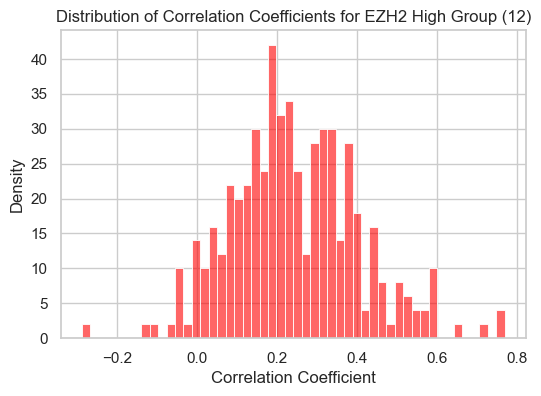

In [37]:
# Plot distributions of correlation coefficients high group
plt.figure(figsize=(6, 4))
sns.histplot(correlations_high_12, bins=50, color='red', alpha=0.6, label='EZH2 High (12)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Density')
plt.title('Distribution of Correlation Coefficients for EZH2 High Group (12)')
plt.show()

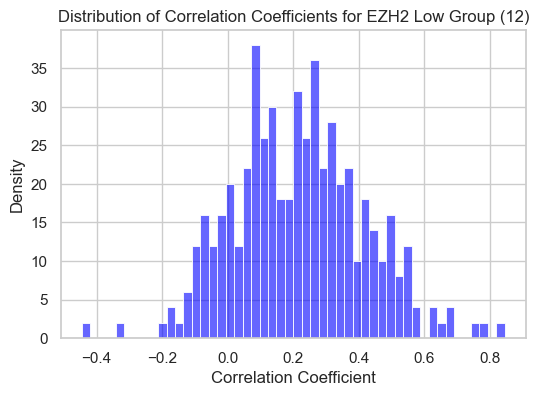

In [39]:
# Plot distributions of correlation coefficients high group
plt.figure(figsize=(6, 4))
sns.histplot(correlations_low_12, bins=50, color='blue', alpha=0.6, label='EZH2 Low (12)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Density')
plt.title('Distribution of Correlation Coefficients for EZH2 Low Group (12)')
plt.show()

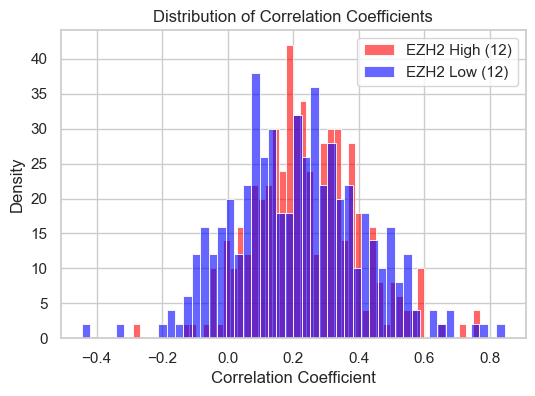

In [41]:
# Plot distributions together
plt.figure(figsize=(6, 4))
sns.histplot(correlations_high_12, bins=50, color='red', alpha=0.6, label='EZH2 High (12)')
sns.histplot(correlations_low_12, bins=50, color='blue', alpha=0.6, label='EZH2 Low (12)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Density')
plt.title('Distribution of Correlation Coefficients')
plt.legend()
plt.show()

In [43]:
# Compute and compare the spread of correlations
minmax_high_12 = [min(correlations_high_12), max(correlations_high_12)]
minmax_low_12 = [min(correlations_low_12), max(correlations_low_12)]
range_high_12 = minmax_high_12[1] - minmax_high_12[0]
range_low_12 = minmax_low_12[1] - minmax_low_12[0]

print("Spread of correlation coefficients (min and max):")
print(f"EZH2 High (12): {minmax_high_12}")
print(f"EZH2 Low (12): {minmax_low_12}")

print("Spread of correlation coefficients (range):")
print(f"EZH2 High (12): {range_high_12}")
print(f"EZH2 Low (12): {range_low_12}")

spread_high_12 = np.percentile(correlations_high_12, [5, 95])
spread_low_12 = np.percentile(correlations_low_12, [5, 95])

print("Spread of correlation coefficients (5th to 95th percentile):")
print(f"EZH2 High (12): {spread_high_12}")
print(f"EZH2 Low (12): {spread_low_12}")

range_high_12 = spread_high_12[1] - spread_high_12[0]
range_low_12 = spread_low_12[1] - spread_low_12[0]

print("Spread of correlation coefficients (percentile range):")
print(f"EZH2 High (12): {range_high_12}")
print(f"EZH2 Low (12): {range_low_12}")

Spread of correlation coefficients (min and max):
EZH2 High (12): [-0.28759652867959423, 0.7683203842478666]
EZH2 Low (12): [-0.44450282965698673, 0.8450750800911082]
Spread of correlation coefficients (range):
EZH2 High (12): 1.0559169129274608
EZH2 Low (12): 1.289577909748095
Spread of correlation coefficients (5th to 95th percentile):
EZH2 High (12): [-0.00378026  0.53218671]
EZH2 Low (12): [-0.09253328  0.54662821]
Spread of correlation coefficients (percentile range):
EZH2 High (12): 0.5359669745363859
EZH2 Low (12): 0.6391614834641277


In [45]:
# Compare absolute correlations to determine extremity
def calculate_extreme_fraction(correlations, threshold=0.8):
    return np.mean(abs(correlations) > threshold)

extreme_fraction_high_12 = calculate_extreme_fraction(correlations_high_12)
extreme_fraction_low_12 = calculate_extreme_fraction(correlations_low_12)

print("Fraction of extreme correlations (|r| > 0.8):")
print(f"EZH2 High (12): {extreme_fraction_high_12:.3%}")
print(f"EZH2 Low (12): {extreme_fraction_low_12:.3%}")

Fraction of extreme correlations (|r| > 0.8):
EZH2 High (12): 0.000%
EZH2 Low (12): 0.362%


In [47]:
# Compare absolute correlations to determine extremity
def calculate_extreme_fraction(correlations, threshold=0.7):
    return np.mean(abs(correlations) > threshold)

extreme_fraction_high_12 = calculate_extreme_fraction(correlations_high_12)
extreme_fraction_low_12 = calculate_extreme_fraction(correlations_low_12)

print("Fraction of extreme correlations (|r| > 0.7):")
print(f"EZH2 High (12): {extreme_fraction_high_12:.3%}")
print(f"EZH2 Low (12): {extreme_fraction_low_12:.3%}")

Fraction of extreme correlations (|r| > 0.7):
EZH2 High (12): 1.087%
EZH2 Low (12): 1.087%


Text(0, 0.5, 'Correlations for High EZH2 Expression for 12 Iteration')

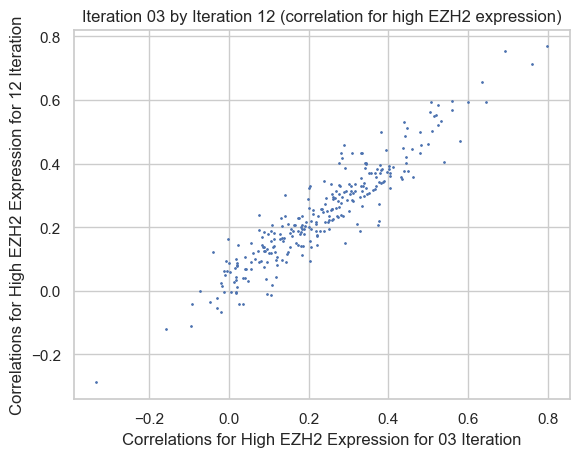

In [49]:
#Creating scatterplot to look at relationship between high EZH2 correlations for Iteration 03 and 12

plt.scatter(correlations_high_03, correlations_high_12, s=0.5)
plt.title("Iteration 03 by Iteration 12 (correlation for high EZH2 expression)")
plt.xlabel("Correlations for High EZH2 Expression for 03 Iteration")
plt.ylabel("Correlations for High EZH2 Expression for 12 Iteration")

Text(0, 0.5, 'Correlations for Low EZH2 Expression for 12 Iteration')

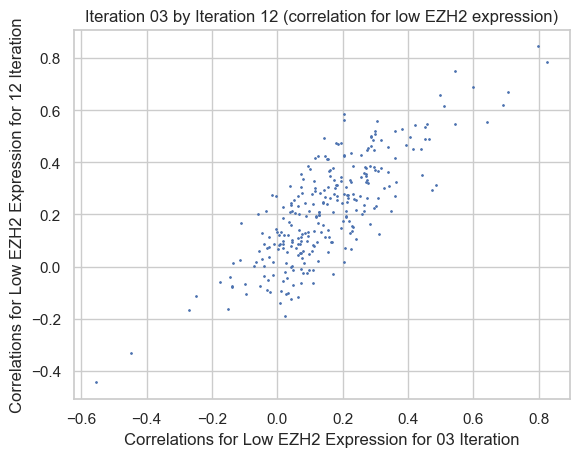

In [51]:
#Creating scatterplot to look at relationship between low EZH2 correlations for Iteration 03 and 12

plt.scatter(correlations_low_03, correlations_low_12, s=0.5)
plt.title("Iteration 03 by Iteration 12 (correlation for low EZH2 expression)")
plt.xlabel("Correlations for Low EZH2 Expression for 03 Iteration")
plt.ylabel("Correlations for Low EZH2 Expression for 12 Iteration")

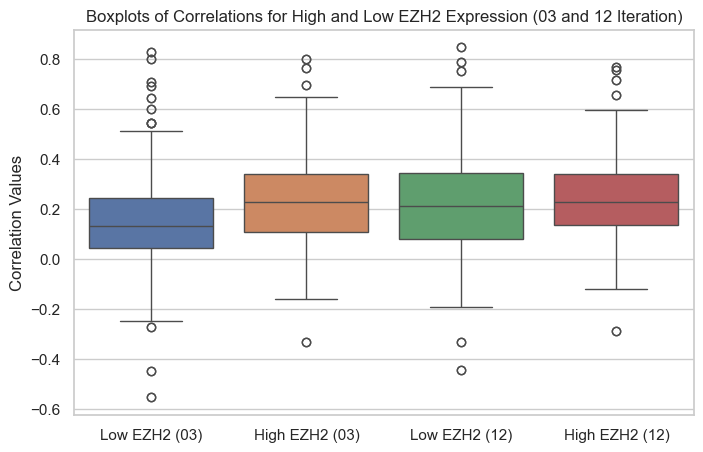

In [53]:
#Creating boxplot to look at relationship for low and high EZH2 correlations for Iteration 03 and 12

boxes = [correlations_low_03, correlations_high_03, correlations_low_12, correlations_high_12]

labels = ["Low EZH2 (03)", "High EZH2 (03)", "Low EZH2 (12)", "High EZH2 (12)"]

plt.figure(figsize=(8, 5))
sns.boxplot(data=boxes)

plt.xticks(ticks=range(4), labels=labels)
plt.title("Boxplots of Correlations for High and Low EZH2 Expression (03 and 12 Iteration)")
plt.ylabel("Correlation Values")
plt.show()

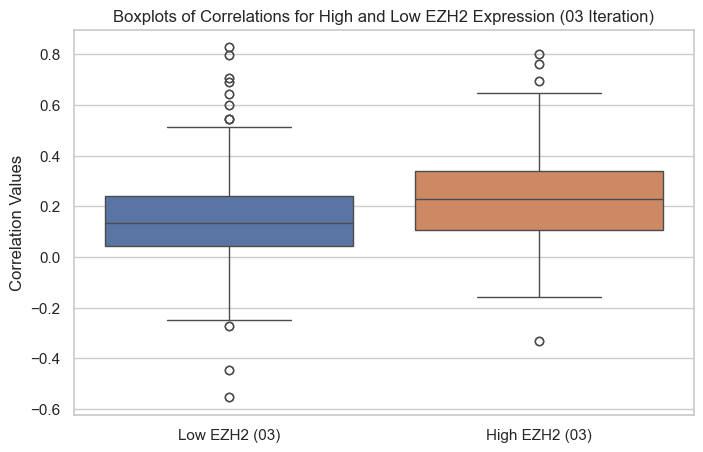

In [55]:
#Creating boxplot to look at relationship for low and high EZH2 correlations for Iteration 03

boxes1 = [correlations_low_03, correlations_high_03]

labels1 = ["Low EZH2 (03)", "High EZH2 (03)"]

plt.figure(figsize=(8, 5))
sns.boxplot(data=boxes1)

plt.xticks(ticks=range(2), labels=labels1)
plt.title("Boxplots of Correlations for High and Low EZH2 Expression (03 Iteration)")
plt.ylabel("Correlation Values")
plt.show()

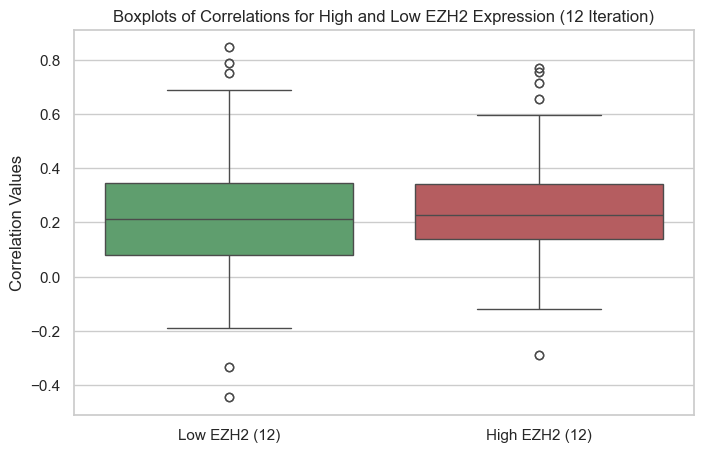

In [57]:
#Creating boxplot to look at relationship for low and high EZH2 correlations for Iteration 12

boxes2 = [correlations_low_12, correlations_high_12]

labels2 = ["Low EZH2 (12)", "High EZH2 (12)"]

default_colors = sns.color_palette("deep")
green_color = default_colors[2]
red_color = default_colors[3]

plt.figure(figsize=(8, 5))
sns.boxplot(data=boxes2, palette=[green_color, red_color])

plt.xticks(ticks=range(2), labels=labels2)
plt.title("Boxplots of Correlations for High and Low EZH2 Expression (12 Iteration)")
plt.ylabel("Correlation Values")
plt.show()

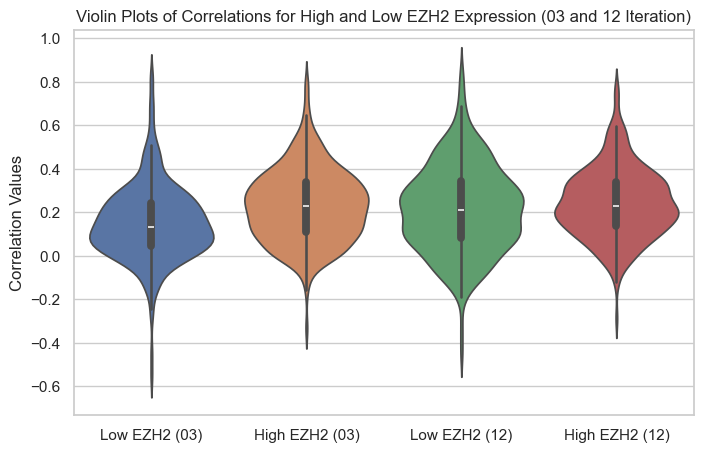

In [62]:
#Creating violin plot to look at relationship for low and high EZH2 correlations for Iteration 03 and 12

violins = [correlations_low_03, correlations_high_03, correlations_low_12, correlations_high_12]

labels = ["Low EZH2 (03)", "High EZH2 (03)", "Low EZH2 (12)", "High EZH2 (12)"]

plt.figure(figsize=(8, 5))
sns.violinplot(data=boxes)

plt.xticks(ticks=range(4), labels=labels)
plt.title("Violin Plots of Correlations for High and Low EZH2 Expression (03 and 12 Iteration)")
plt.ylabel("Correlation Values")
plt.show()

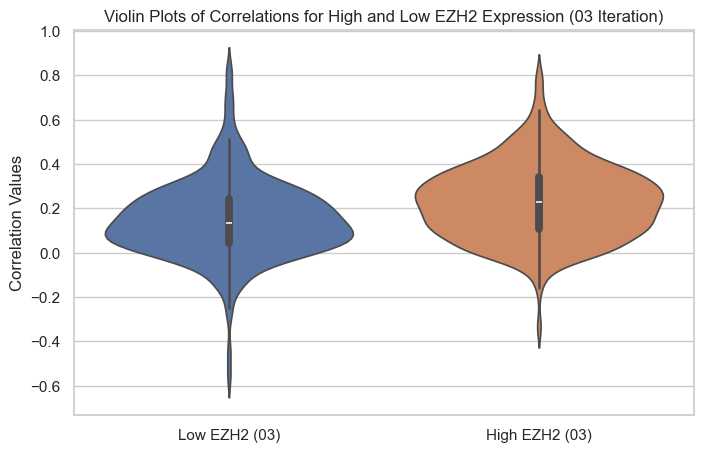

In [64]:
#Creating violin plot to look at relationship for low and high EZH2 correlations for Iteration 03

violins1 = [correlations_low_03, correlations_high_03]

labels1 = ["Low EZH2 (03)", "High EZH2 (03)"]

plt.figure(figsize=(8, 5))
sns.violinplot(data=violins1)

plt.xticks(ticks=range(2), labels=labels1)
plt.title("Violin Plots of Correlations for High and Low EZH2 Expression (03 Iteration)")
plt.ylabel("Correlation Values")
plt.show()

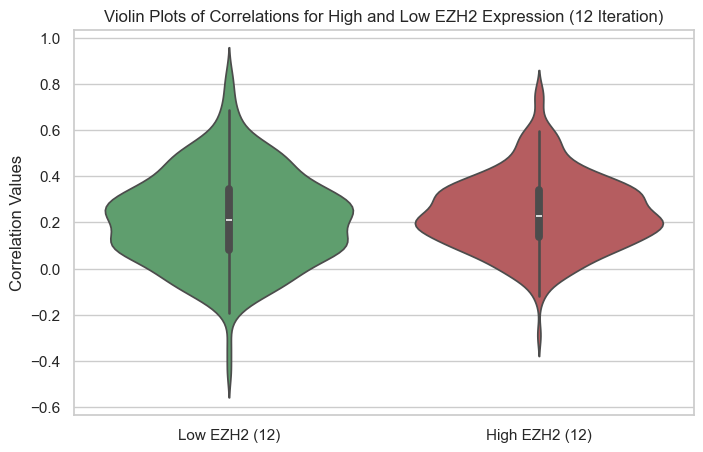

In [66]:
#Creating scatterplot to look at boxplos for low and high EZH2 correlations for Iteration 12

violins2 = [correlations_low_12, correlations_high_12]

labels2 = ["Low EZH2 (12)", "High EZH2 (12)"]

default_colors = sns.color_palette("deep")
green_color = default_colors[2]
red_color = default_colors[3]

plt.figure(figsize=(8, 5))
sns.violinplot(data=violins2, palette=[green_color, red_color])

plt.xticks(ticks=range(2), labels=labels2)
plt.title("Violin Plots of Correlations for High and Low EZH2 Expression (12 Iteration)")
plt.ylabel("Correlation Values")
plt.show()

In [76]:
#Rank sum test for 03 iteration

from scipy.stats import ranksums

def rank_sum_test(sample1, sample2, alternative='two-sided'):
    U_stat, p_value = ranksums(sample1, sample2, alternative=alternative)
    return U_stat, p_value

U_stat, p_value = rank_sum_test(correlations_low_03, correlations_high_03)
print(f"Statistic: {U_stat}, p-value: {p_value}")

Statistic: -8.125361068891928, p-value: 4.460326248844827e-16


In [78]:
#Rank sum test for 12 iteration

from scipy.stats import ranksums

def rank_sum_test(sample1, sample2, alternative='two-sided'):
    U_stat, p_value = ranksums(sample1, sample2, alternative=alternative)
    return U_stat, p_value

U_stat, p_value = rank_sum_test(correlations_low_12, correlations_high_12)
print(f"Statistic: {U_stat}, p-value: {p_value}")

Statistic: -2.4602626730901394, p-value: 0.013883536116011343
